In [1]:
%matplotlib inline

In [13]:
%run dog-breed-cnn.py
# Unzip the train and test zip file
archive_train = ZipFile("Data/test.zip", "r")
archive_test = ZipFile("Data/train.zip", "r")

# This line shows the 5 first image name of the train database
archive_train.namelist()[0:5]

# This line shows the number of images in the train database, 
# noted that we must remove the 1st value (column header)
len(archive_train.namelist()[:]) - 1

10357

In [14]:
%run dog-breed-cnn.py

image_resize = 60

DataBase_creator(archivezip=archive_train, nwidth=image_resize, nheight=image_resize, save_name="train")

DataBase_creator(archivezip=archive_test, nwidth=image_resize, nheight=image_resize, save_name="test")


Time elapsed: 0:02:15
Time elapsed: 0:01:47


In [18]:
# Load TRAIN
train = pickle.load(open("train.p","rb"))
train.shape

(10357, 60, 60, 3)

In [17]:
# Load TEST
test = pickle.load(open("test.p","rb"))
test.shape

(10222, 60, 60, 3)

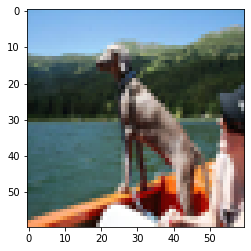

In [22]:
lum_img = train[100,:,:,:]
plt.imshow(lum_img)
plt.show()

In [23]:
"""CHECKING LABELS FILE"""
labels_raw = pd.read_csv('Data/labels.csv', header=0, sep=',', quotechar='"')
labels_raw.sample(5)

,id,breed
8747,db431821761a83efec50967b2a04e289,lhasa
515,0c71084d955bfca989d865cbcf8cf8ae,japanese_spaniel
127,02ff77af410e966b7b661f6f0789d947,golden_retriever
5049,7fcefdba3fd6402705bdf39258177d42,scottish_deerhound
254,05e93a5604440b065143c81be16cd395,whippet


In [25]:
"""EXTRACTING THE MOST REPRESENTED LABELS"""
%run dog-breed-cnn.py

Nber_of_breeds = 8
labels_filtered_index = main_breeds(labels_raw=labels_raw, Nber_breeds = Nber_of_breeds, all_breeds = 'FALSE')
labels_filtered = labels_raw.iloc[labels_filtered_index[0], :]
train_filtered = train[labels_filtered_index[0],:,:,:]

print(f'- Number of images remaining after selecting the {Nber_of_breeds} main breeds: {labels_filtered_index[0].shape}')
print(f'- The shape of train_filtered dataset is: {train_filtered.shape}')


- Number of images remaining after selecting the 8 main breeds: (922,)
- The shape of train_filtered dataset is: (922, 60, 60, 3)


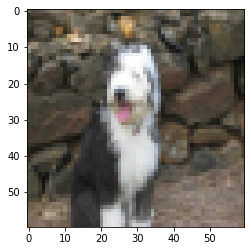

In [26]:
lum_img = train_filtered[1,:,:,:]
plt.imshow(lum_img)
plt.show()

In [28]:
%run dog-breed-cnn.py

"""ONE-HOT LABELS"""
# Select labels from the N main breeds
labels = labels_filtered["breed"].to_numpy()
labels = labels.reshape(labels.shape[0],1)

labels.shape


(922, 1)

In [30]:
%run dog-breed-cnn.py
labels_name, labels_bin = matrix_Bin(labels = labels)
labels_bin[0:9]

Nbver SubVariables 8
Shape: (922, 8)


array([[0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.]])

In [31]:
"""QUICK CHECK ON LABELS"""
for breed in range(len(labels_name)):
    print(f"Breed: {breed}: {labels_name[breed]}")

Breed: 0: afghan_hound
Breed: 1: bernese_mountain_dog
Breed: 2: entlebucher
Breed: 3: great_pyrenees
Breed: 4: maltese_dog
Breed: 5: pomeranian
Breed: 6: scottish_deerhound
Breed: 7: shih-tzu


In [32]:
labels_cls = np.argmax(labels_bin, axis=1)
labels[0:9]

array([['scottish_deerhound'],
       ['maltese_dog'],
       ['shih-tzu'],
       ['scottish_deerhound'],
       ['entlebucher'],
       ['entlebucher'],
       ['maltese_dog'],
       ['bernese_mountain_dog'],
       ['entlebucher']], dtype=object)